In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Read train data
train_data = pd.read_csv("MachineHack_Train.csv")

In [4]:
# randomly display data
train_data.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
67231,12257,1517,1765,10,2011-09-16 09:03:00,2.08,12963.0,35
29244,16141,3053,3189,2,2011-11-13 15:42:00,1.95,15005.0,35
77343,6455,742,787,6,2011-05-12 12:05:00,1.25,14988.0,35
15513,8277,1193,2200,1,2011-06-19 12:26:00,2.95,16813.0,35
120188,12975,2033,1762,20,2011-09-28 14:57:00,2.08,14911.0,10


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 8 columns):
InvoiceNo      284780 non-null int64
StockCode      284780 non-null int64
Description    284780 non-null int64
Quantity       284780 non-null int64
InvoiceDate    284780 non-null object
UnitPrice      284780 non-null float64
CustomerID     284780 non-null float64
Country        284780 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 17.4+ MB


This dataset contains 284780 rows and 8 columns. 

In [6]:
train_data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

There is no missing value in the dataset

In [7]:
# Convert from float to int format
train_data["CustomerID"] = train_data["CustomerID"].astype('int8')

In [8]:
# Convert from object to datetime format
train_data["InvoiceDate"] = pd.to_datetime(train_data["InvoiceDate"])

In [9]:
train_data.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000
mean,9955.394083,1573.386807,2023.955573,12.028468,3.451216,-3.380806,32.823846
std,5551.519138,843.604991,1089.812078,295.111588,78.399541,73.499315,6.743602
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,-128.000000,0.000000
25%,5069.000000,939.000000,1141.000000,2.000000,1.250000,-68.000000,35.000000
50%,10310.000000,1521.000000,1987.000000,5.000000,1.950000,-5.000000,35.000000
75%,14657.000000,2106.000000,2945.000000,12.000000,3.750000,62.000000,35.000000
max,22188.000000,3683.000000,3895.000000,80995.000000,38970.000000,127.000000,36.000000


CustomerID and Quantity have negative values

In [10]:
train_data[train_data["Quantity"] < 0].shape

(6167, 8)

There are 6167 rows in dataset whose quantities are negative. Taking absolute value of this column since Quantity cann't be negative

In [11]:
train_data["Quantity"] = abs(train_data["Quantity"])

In [12]:
train_data[train_data["Quantity"] < 0].shape

(0, 8)

In [13]:
train_data[train_data["CustomerID"] < 0].shape

(146307, 8)

There are 146307 rows in dataset whose customer id's are negative. Taking absolute value of this column

In [15]:
train_data["CustomerID"] = abs(train_data["CustomerID"])

In [16]:
train_data[train_data["CustomerID"] < 0].shape

(472, 8)

In [17]:
train_data[train_data["CustomerID"] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,-128,35
1084,13995,2781,1872,4,2011-10-13 16:14:00,1.45,-128,35
1545,3854,342,3119,2,2011-03-13 10:25:00,0.85,-128,35
2449,5350,915,2250,24,2011-04-15 09:27:00,0.29,-128,35
2647,7762,1467,2394,36,2011-06-08 12:38:00,0.19,-128,35
...,...,...,...,...,...,...,...,...
283276,9195,742,787,6,2011-07-11 12:31:00,1.25,-128,35
283453,10891,3141,113,24,2011-08-18 16:27:00,0.55,-128,35
283696,4085,991,2317,40,2011-03-18 12:18:00,2.55,-128,35
283948,9398,279,2437,12,2011-07-15 08:09:00,1.25,-128,35


In [18]:
train_data["CustomerID"].value_counts()

 79     9664
 52     5786
 63     5702
 16     5522
 49     4050
        ... 
 78     1095
 0      1072
 17     1070
 29     1056
-128     472
Name: CustomerID, Length: 129, dtype: int64

There are still 472 rows in dataset whose customer ids are negative and have same value 128. Deleting these rows from dataset

In [19]:
train_data.drop(train_data[train_data["CustomerID"] < 0].index, inplace=True)
train_data.reset_index(drop=True, inplace=True)

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284308 entries, 0 to 284307
Data columns (total 8 columns):
InvoiceNo      284308 non-null int64
StockCode      284308 non-null int64
Description    284308 non-null int64
Quantity       284308 non-null int64
InvoiceDate    284308 non-null datetime64[ns]
UnitPrice      284308 non-null float64
CustomerID     284308 non-null int8
Country        284308 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(5), int8(1)
memory usage: 15.5 MB


In [21]:
# Creating a new dataframe consist of InvoiceNo, StockCode, Quantity, UnitPrice and CustomerID
train_df = pd.DataFrame(train_data)

In [22]:
train_df = train_df[["InvoiceNo", "StockCode", "Quantity", "UnitPrice", "CustomerID"]]

In [23]:
train_df.head(5)

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID
0,6141,1583,3,3.75,24
1,6349,1300,6,1.95,42
2,16783,2178,4,5.95,60
3,16971,2115,1,0.83,91
4,17388,495,5,1.65,9


#### Identify and Remove Outliers

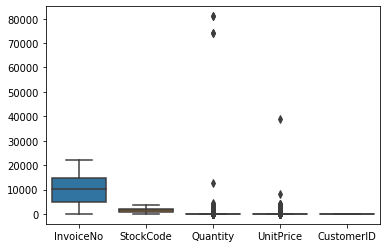

In [24]:
sns.boxplot(data=train_df)

UnitPrice and Quantity columns have outliers

In [25]:
# Detect and remove data points that are outliers in UnitPrice column
up_Q1 =  train_df['UnitPrice'].quantile(0.25)
up_Q3 =  train_df['UnitPrice'].quantile(0.75)

In [26]:
up_IQR = up_Q3 - up_Q1

In [27]:
up_outlier = train_df[(train_df['UnitPrice'] < up_Q1-1.5*up_IQR ) | (train_df['UnitPrice'] > up_Q3+1.5*up_IQR)]['UnitPrice']

In [28]:
print(len(up_outlier))

25141


In [29]:
up_outliers_index = train_df[(train_df['UnitPrice'] < up_Q1-1.5*up_IQR ) | (train_df['UnitPrice'] > up_Q3+1.5*up_IQR)].index

In [30]:
up_outliers_index

Int64Index([    23,     24,     35,     48,     50,     62,     68,     82,
                87,     91,
            ...
            284168, 284186, 284203, 284235, 284256, 284270, 284278, 284291,
            284293, 284305],
           dtype='int64', length=25141)

In [31]:
train_df.drop(up_outliers_index, inplace=True)

In [32]:
# Detect and remove data points that are outliers in Quantity column
qty_Q1 =  train_df['Quantity'].quantile(0.25)
qty_Q3 =  train_df['Quantity'].quantile(0.75)

In [33]:
qty_IQR = qty_Q3 - qty_Q1

In [34]:
qty_outlier = train_df[(train_df['Quantity'] < qty_Q1-1.5*qty_IQR ) | (train_df['Quantity'] > qty_Q3+1.5*qty_IQR)]['Quantity']

In [35]:
print(len(qty_outlier))

18077


In [36]:
qty_outliers_index = train_df[(train_df['Quantity'] < qty_Q1-1.5*qty_IQR ) | (train_df['Quantity'] > qty_Q3+1.5*qty_IQR)].index

In [37]:
qty_outliers_index

Int64Index([    11,     19,     34,     42,     46,     59,     63,     70,
                74,     81,
            ...
            284185, 284217, 284220, 284221, 284240, 284246, 284258, 284265,
            284287, 284306],
           dtype='int64', length=18077)

In [38]:
train_df.drop(qty_outliers_index, inplace=True)

In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241090 entries, 0 to 284307
Data columns (total 5 columns):
InvoiceNo     241090 non-null int64
StockCode     241090 non-null int64
Quantity      241090 non-null int64
UnitPrice     241090 non-null float64
CustomerID    241090 non-null int8
dtypes: float64(1), int64(3), int8(1)
memory usage: 9.4 MB


In [40]:
train_df.describe()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID
count,241090.000000,241090.000000,241090.000000,241090.000000,241090.000000
mean,10020.282658,1555.091746,7.420258,2.200485,64.418761
std,5544.156456,837.215444,6.760787,1.547534,35.392150
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,5114.000000,920.000000,2.000000,1.250000,36.000000
50%,10459.000000,1516.000000,5.000000,1.650000,65.000000
75%,14752.750000,2089.000000,12.000000,2.950000,93.000000
max,22186.000000,3683.000000,27.000000,7.500000,127.000000


In [41]:
X = train_df.drop(["UnitPrice"], axis=1)
y = train_df["UnitPrice"]

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
#Split dataset into Train Test with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [44]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(192872, 4)

(48218, 4)

(192872,)

(48218,)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
linreg = LinearRegression()

In [47]:
model = linreg.fit(X_train, y_train)
predict = model.predict(X_test)
predict

array([2.54084215, 2.38461195, 2.38305921, ..., 2.30524933, 2.05609975,
       2.79658011])

**Regression Evaluation Metrics**

In [48]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE: 1.1221532383098145
MSE: 2.090503440176491
RMSE: 1.4458573374218118


In [49]:
# Read Test data
test_data = pd.read_csv("MachineHack_Test.csv")

In [50]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122049 entries, 0 to 122048
Data columns (total 7 columns):
InvoiceNo      122049 non-null int64
StockCode      122049 non-null int64
Description    122049 non-null int64
Quantity       122049 non-null int64
InvoiceDate    122049 non-null object
CustomerID     122049 non-null float64
Country        122049 non-null int64
dtypes: float64(1), int64(5), object(1)
memory usage: 6.5+ MB


In [53]:
test_data["CustomerID"] = test_data["CustomerID"].astype('int8')
test_data["InvoiceDate"] = pd.to_datetime(test_data["InvoiceDate"])

In [54]:
test_data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
CustomerID     0
Country        0
dtype: int64

In [51]:
test_data.describe()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country
count,122049.000000,122049.000000,122049.000000,122049.000000,122049.000000,122049.000000
mean,9940.419692,1572.955788,2026.412744,12.137920,15286.445256,32.836795
std,5554.116349,845.106082,1087.697388,54.311646,1711.887591,6.726816
min,0.000000,0.000000,0.000000,-9360.000000,12347.000000,0.000000
25%,5018.000000,937.000000,1147.000000,2.000000,13953.000000,35.000000
50%,10311.000000,1523.000000,1987.000000,5.000000,15152.000000,35.000000
75%,14635.000000,2106.000000,2945.000000,12.000000,16782.000000,35.000000
max,22189.000000,3683.000000,3895.000000,4800.000000,18287.000000,36.000000


In [55]:
test_data[test_data["Quantity"] < 0].shape

(2738, 7)

There are 2738 rows in dataset whose quantities are negative. Taking absolute value of this column since Quantity cann't be negative

In [56]:
test_data["Quantity"] = abs(test_data["Quantity"])

In [57]:
test_data[test_data["Quantity"] < 0].shape

(0, 7)

In [58]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122049 entries, 0 to 122048
Data columns (total 7 columns):
InvoiceNo      122049 non-null int64
StockCode      122049 non-null int64
Description    122049 non-null int64
Quantity       122049 non-null int64
InvoiceDate    122049 non-null datetime64[ns]
CustomerID     122049 non-null int8
Country        122049 non-null int64
dtypes: datetime64[ns](1), int64(5), int8(1)
memory usage: 5.7 MB


In [59]:
# Creating a new dataframe consist of InvoiceNo, StockCode, Quantity, UnitPrice and CustomerID
test_df = pd.DataFrame(test_data)

In [60]:
test_df = test_df[["InvoiceNo", "StockCode", "Quantity", "CustomerID"]]

In [61]:
model2 = linreg.fit(X_train, y_train)
model2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
predict2 = model2.predict(test_df)

In [63]:
predict2

array([ 2.67061202,  2.80149107, -0.22488218, ...,  2.50684573,
        2.76843803,  2.68267501])

In [64]:
predict2.shape

(122049,)

In [65]:
df = pd.DataFrame({"UnitPrice" : predict2})

In [66]:
writer = pd.ExcelWriter("Unit_Price_Prediction.xlsx")
df.to_excel(writer, "Unit Price", index=False)
writer.save()